In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
%matplotlib inline

In [4]:
loan_data = pd.read_csv('loan.csv')
loan_data.head()

C:\Users\tanaj\AppData\Local\Temp\ipykernel_24948\174373214.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan_data.describe(include='all')

missing_values = loan_data.isnull().sum()
print(missing_values)


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [6]:
for column in loan_data.columns:
    if loan_data[column].dtype == 'object':
        loan_data[column].fillna(loan_data[column].mode()[0],inplace=True)
    else:
        loan_data[column].fillna(loan_data[column].median(),inplace=True)
missing_values_after = loan_data.isnull().sum()
missing_values_after

C:\Users\tanaj\AppData\Local\Temp\ipykernel_24948\48826395.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data[column].fillna(loan_data[column].median(),inplace=True)
C:\Users\tanaj\AppData\Local\Temp\ipykernel_24948\48826395.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                         0
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
if 'data' in loan_data.columns:
    loan_data['data'] = pd.to_datetime(loan_data['date'])

loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [8]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


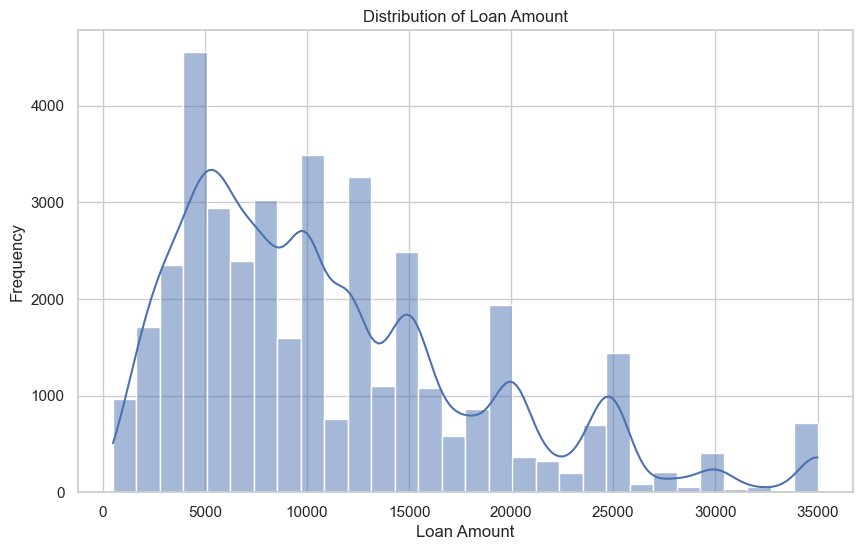

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(loan_data['loan_amnt'],kde=True, bins=30)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

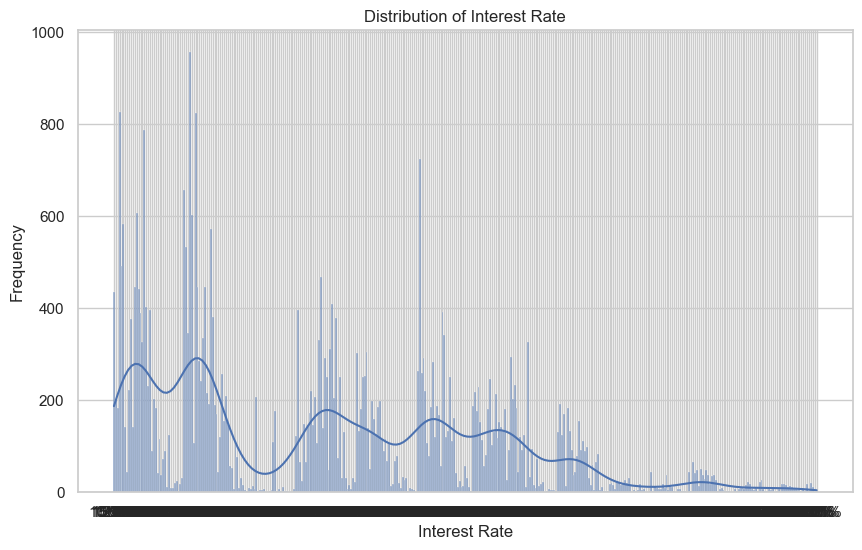

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(loan_data['int_rate'],kde=True, bins=30)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

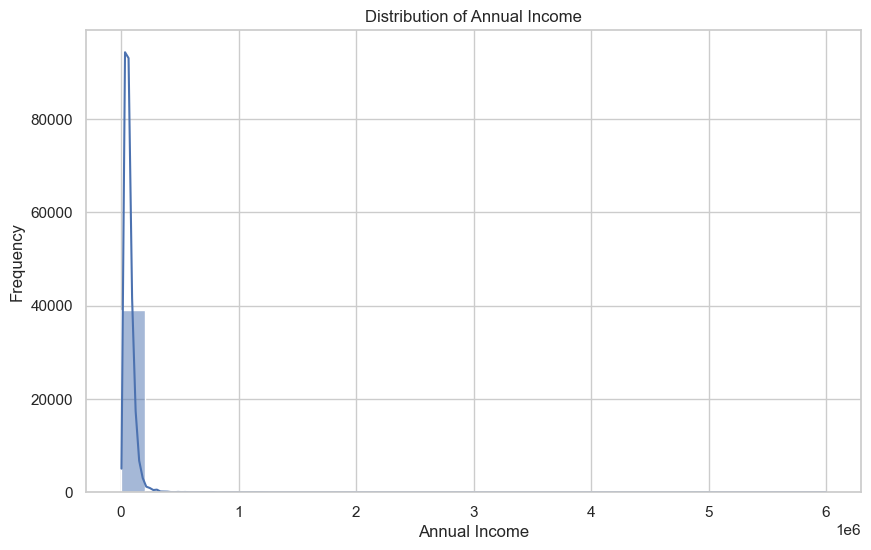

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(loan_data['annual_inc'],kde=True, bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

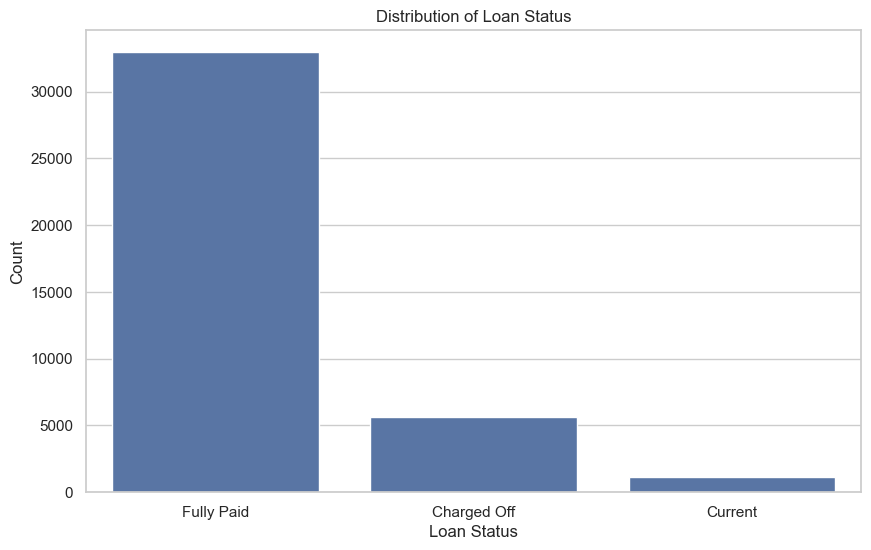

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='loan_status', data= loan_data)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

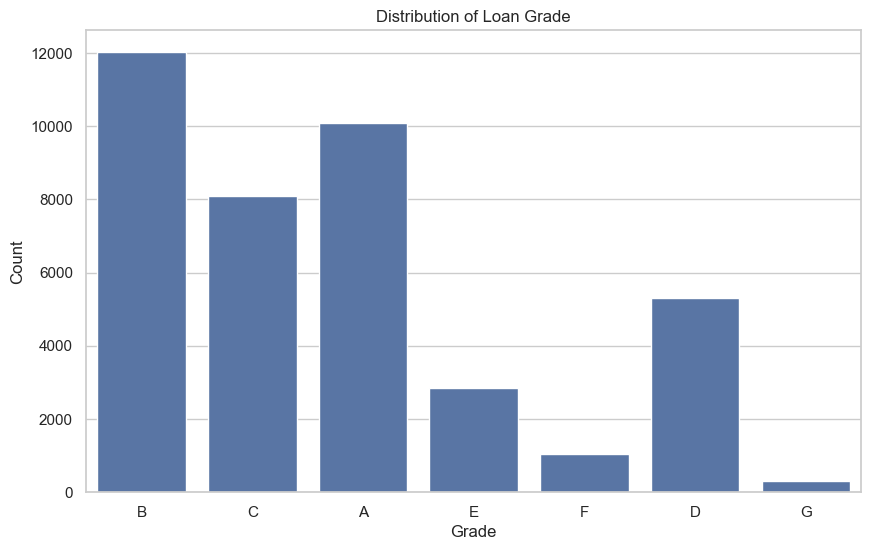

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='grade', data= loan_data)
plt.title('Distribution of Loan Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

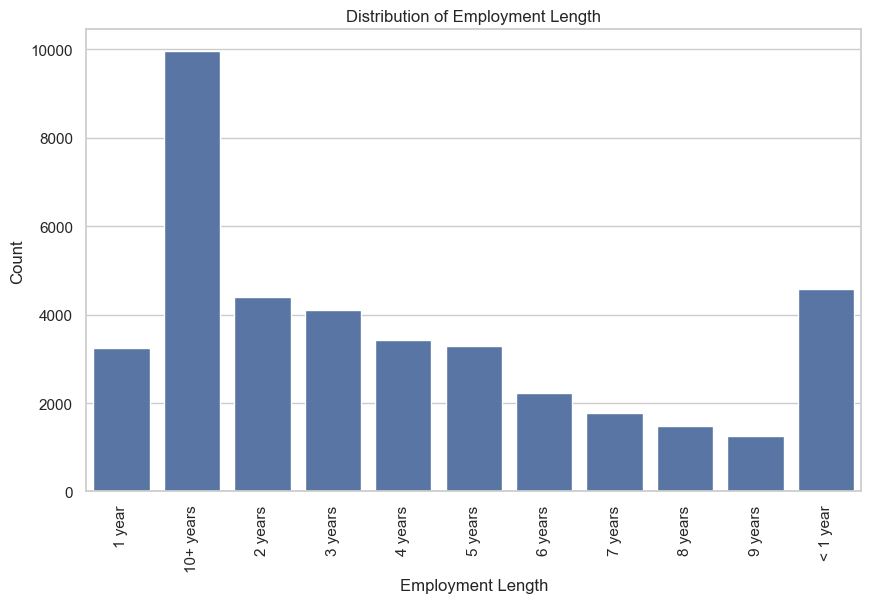

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length', data= loan_data, order=sorted(loan_data['emp_length'].dropna().unique()))
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

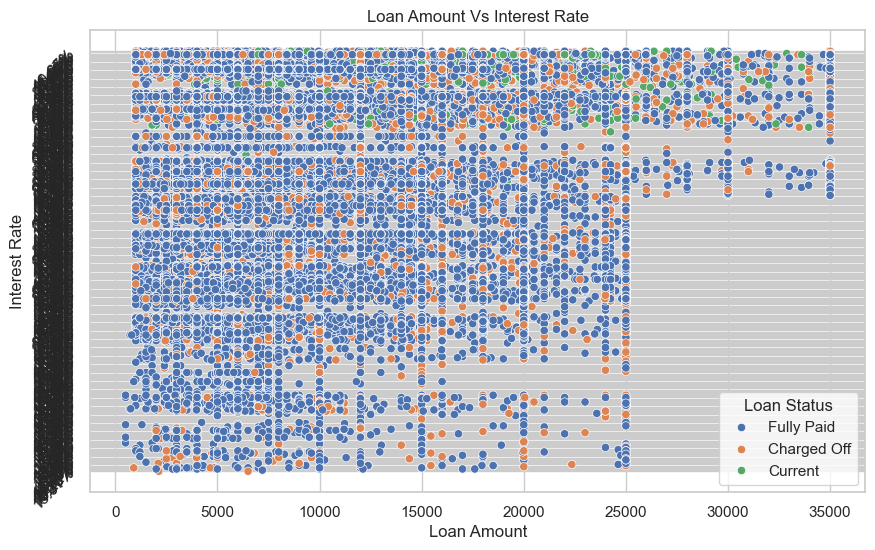

In [15]:
#  Bivariate Analysis

plt.figure(figsize=(10,6))
sns.scatterplot(x='loan_amnt', y='int_rate' ,hue='loan_status', data= loan_data)
plt.title('Loan Amount Vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.legend(title= 'Loan Status')
plt.yticks(rotation=45)
plt.show()

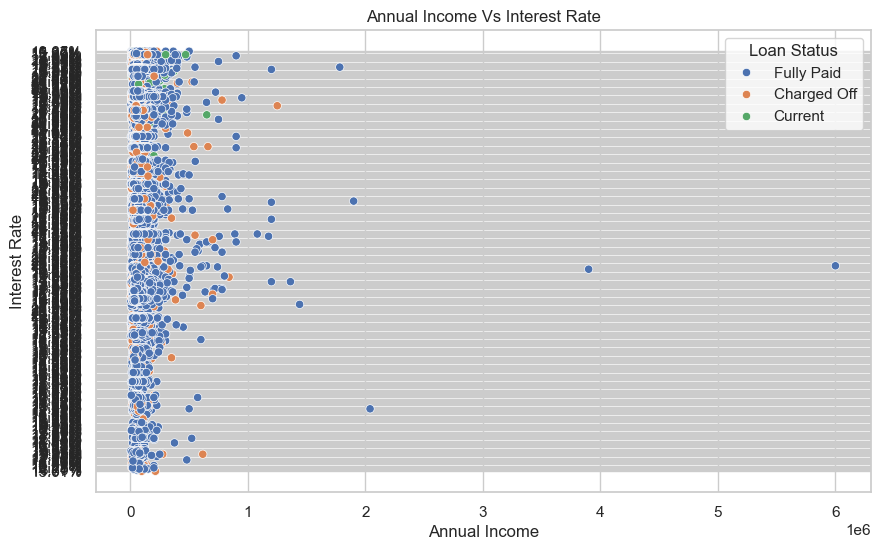

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='annual_inc', y='int_rate' ,hue='loan_status', data= loan_data)
plt.title('Annual Income Vs Interest Rate')
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')
plt.legend(title= 'Loan Status')
plt.show()

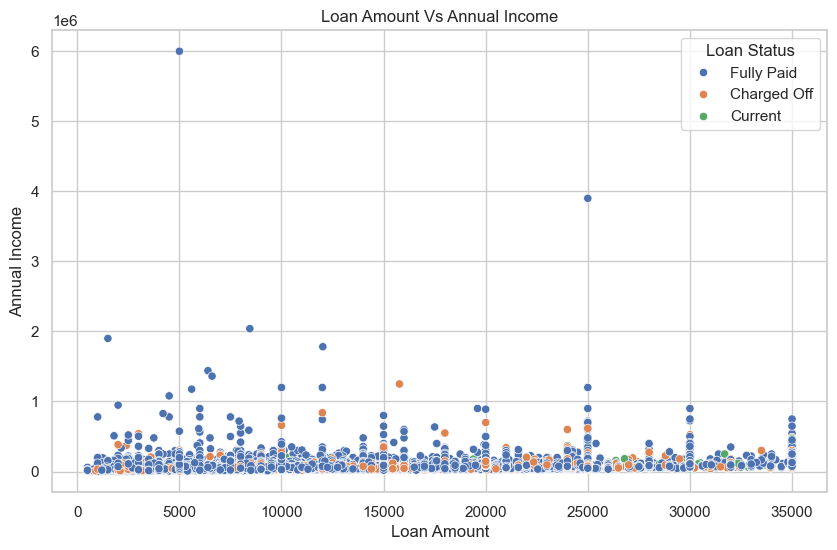

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='loan_amnt', y='annual_inc' ,hue='loan_status', data= loan_data)
plt.title('Loan Amount Vs Annual Income')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.legend(title= 'Loan Status')
plt.show()

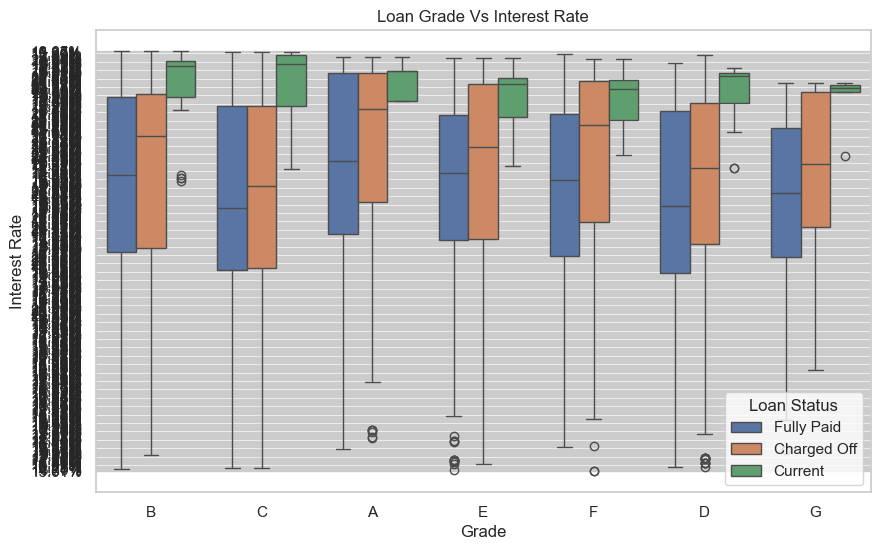

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='int_rate' ,hue='loan_status', data= loan_data)
plt.title('Loan Grade Vs Interest Rate')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.legend(title= 'Loan Status')
plt.show()

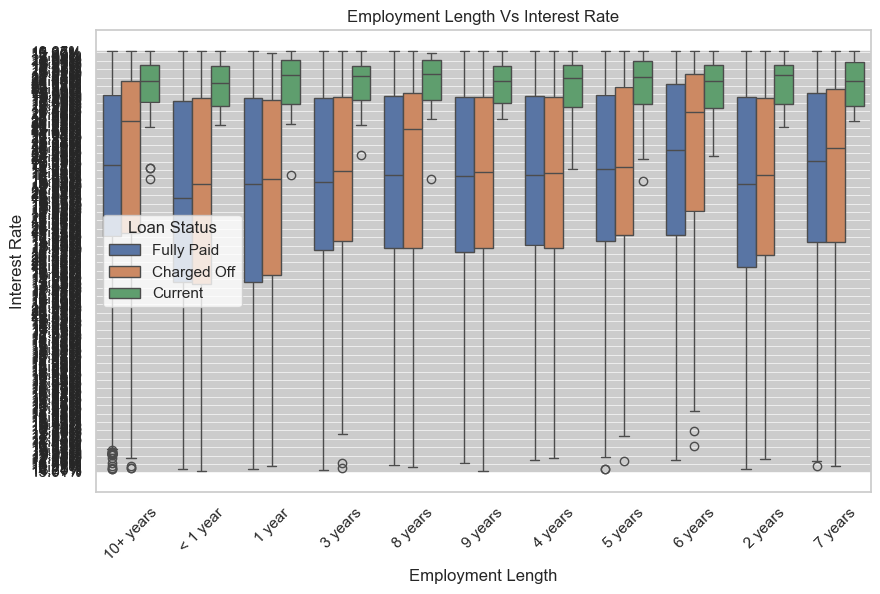

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='emp_length', y='int_rate' ,hue='loan_status', data= loan_data, order=(loan_data['emp_length'].dropna().unique()))
plt.title('Employment Length Vs Interest Rate')
plt.xlabel('Employment Length')
plt.ylabel('Interest Rate')
plt.legend(title= 'Loan Status')
plt.xticks(rotation=45)
plt.show()

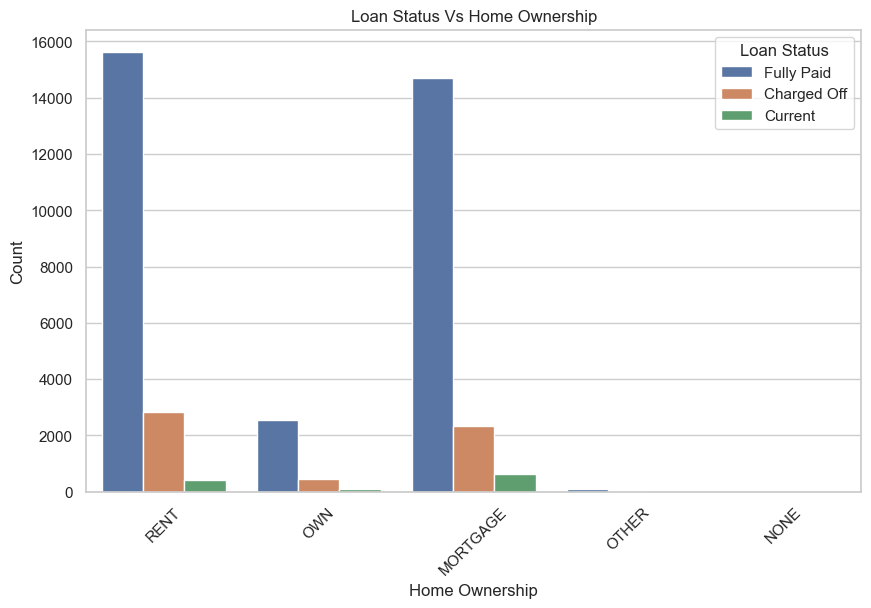

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership',hue='loan_status', data= loan_data)
plt.title('Loan Status Vs Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title= 'Loan Status')
plt.xticks(rotation=45)
plt.show()

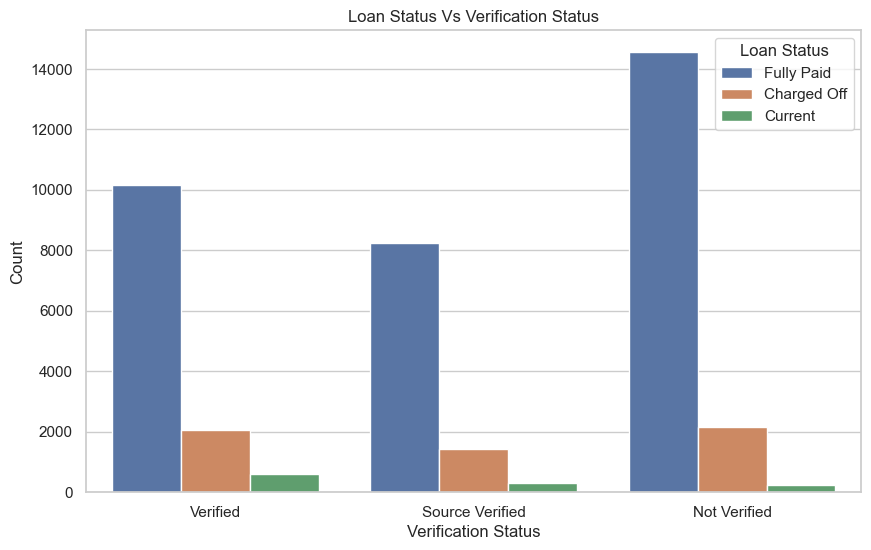

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='verification_status',hue='loan_status', data= loan_data)
plt.title('Loan Status Vs Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title= 'Loan Status')
plt.show()

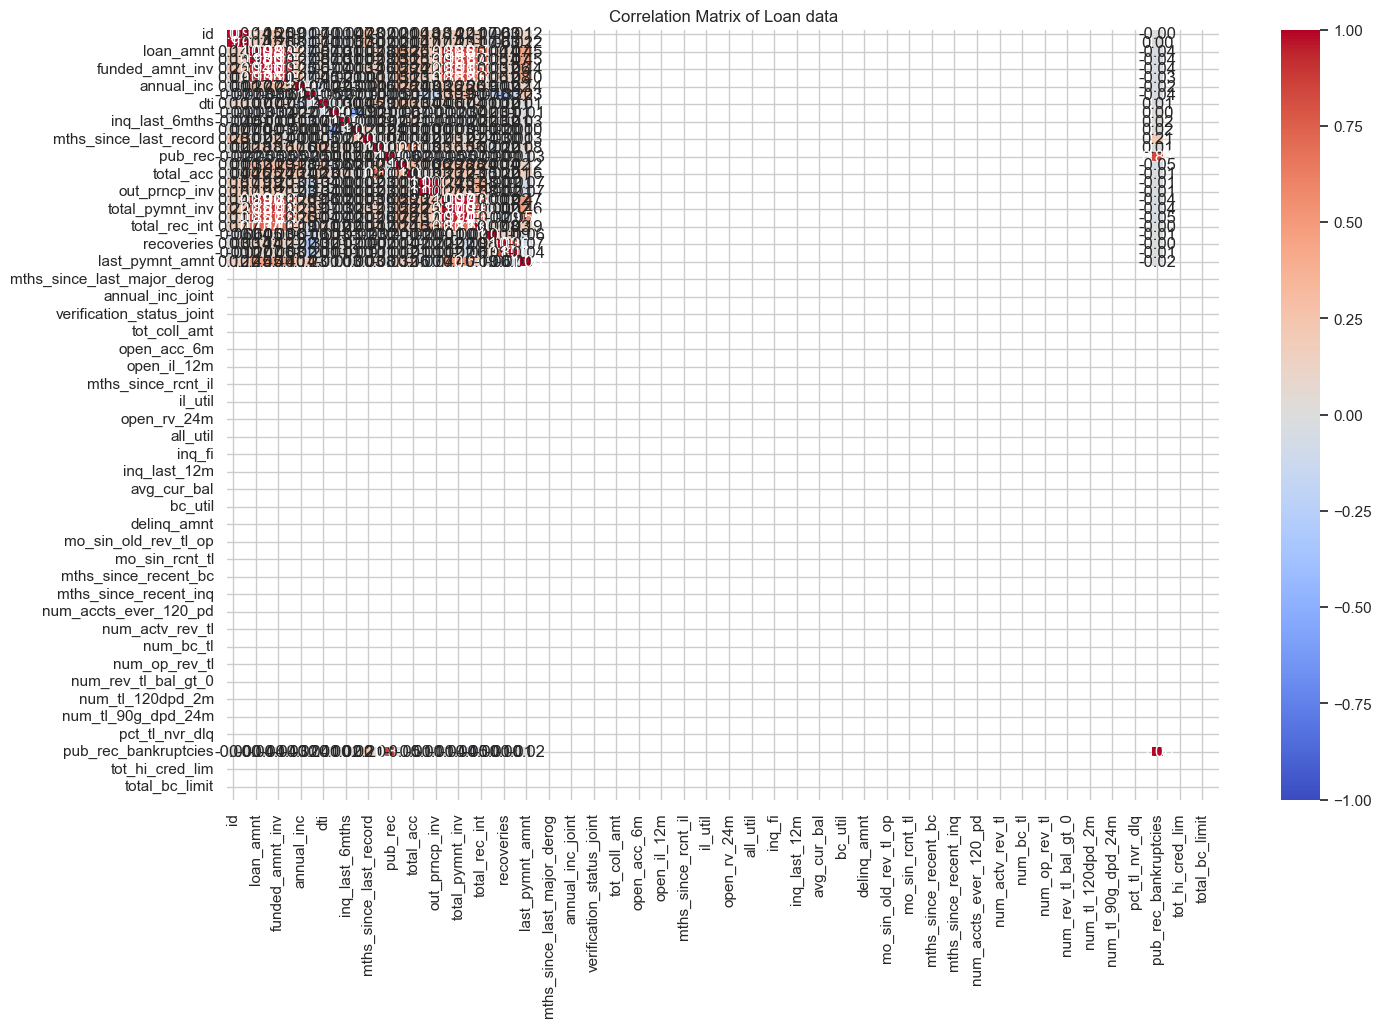

correlation of features with Loan Default:
 loan_status                   1.000000
total_rec_prncp               0.302839
last_pymnt_amnt               0.233293
total_pymnt                   0.192413
total_pymnt_inv               0.187913
                                ...   
tax_liens                          NaN
tot_hi_cred_lim                    NaN
total_bal_ex_mort                  NaN
total_bc_limit                     NaN
total_il_high_credit_limit         NaN
Name: loan_status, Length: 88, dtype: float64


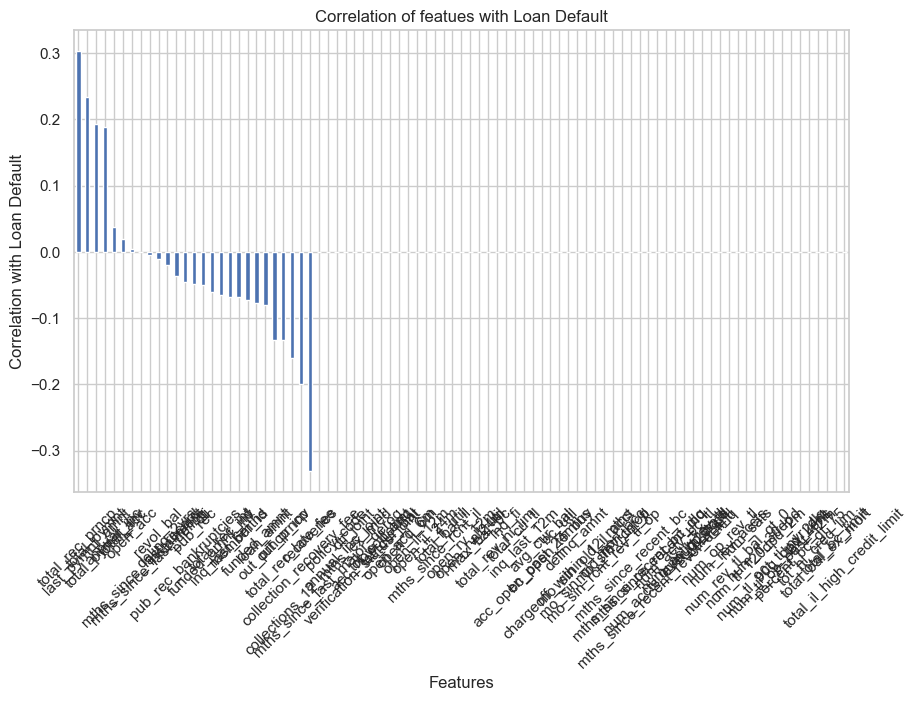

In [22]:
# correlation Analysis

if loan_data['loan_status'].dtype == 'object':
    loan_data['loan_status'] = loan_data['loan_status'].astype('category').cat.codes

numeric_columns = loan_data.select_dtypes(include=[np.number]).columns

correlation_matrix = loan_data[numeric_columns].corr()

plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Loan data')
plt.show()


if 'loan_status' in loan_data.columns:
    correlation_with_default = correlation_matrix['loan_status'].sort_values(ascending=False)
    print("correlation of features with Loan Default:\n",correlation_with_default)

plt.figure(figsize=(10,6))
correlation_with_default.drop('loan_status').plot(kind='bar')
plt.title('Correlation of featues with Loan Default')
plt.xlabel('Features')
plt.ylabel('Correlation with Loan Default')
plt.xticks(rotation=45)
plt.show()

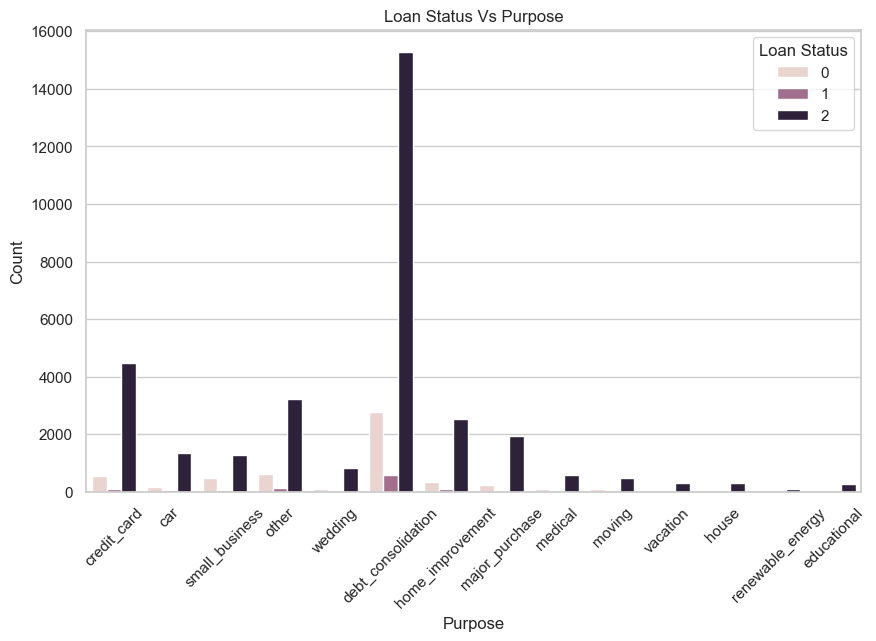

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='loan_status', data= loan_data)
plt.title('Loan Status Vs Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title= 'Loan Status')
plt.show()

In [ ]:
# key Insights:
# 1. Loan Amount: Higher loan amounts are associated with higher interest rates and a higher likelihood of default.
# 2. Interest Rate: Higher interest rates are strongly correlated with the loan defaults.
# 3. Annual Income: Lower annual income are associated with higher interest rates and a higher likelihood to default.
# 4. Loan Grade : Lower grades (e.g. D,E,F,G) have higher interest rates and a higher likelihood to default.
# 5. Employment Length: Shorter employment length are associated with higher interest rates and a higher likelihood to default.
# 6. Home Ownership: Renters have a higher likehood of default compared to homeowners.
# 7. Verification Status: Loans with verified income have a lower likelihood to default.

# Recommendations:

# 1. Implement stricter approval criteria for higher loan amounts and lower loan grades to migrate risk.
# 2. Offer lower interest rates to applicants with higher annual incomes and longer employment lengths to attract low-risk borrowers.
# 3. Priorities loan approvals for homeowners and applicants with verified income to reduce default rates.
# 4. Continuously monitor and update risk assessment models based on historical data to improve accuracy.
# 5. Consider offering financial literacy progress to borrowers to help them manage their loans better and reduce default rates.